
# <span style="color:rgb(213,80,0)"> **Primer Examen Parcial** (Cinemática y Dinámica de un robot SCARA con tres grados de libertad)</span>

Nombre del alumno:


Rodriguez Torres Angel Adrian


Flores Pradel Mauricio


Asignatura: Robótica


Grupo:01


Profesor: M.I. Erik Peña Medina

## Introducción

Este estudio examina cómo funciona un robot SCARA de tres partes y tres ejes rotativos, uno de los cuales está fijado al sistema coordenado. El estudio tiene como propósito determinar la relación que existe entre el posicionamiento, la alineación y las rotaciones de cada junta con la tarea objetivo que se le ha encomendado al robot. Para comenzar, se emplea el modelo cinemático para determinar la disposición espacial, las tasas de movimiento y los cambios de velocidad del robot desde su origen hasta su dispositivo final. En fases posteriores, se desarrolla el modelo dinámico a través del método de Euler\-Lagrange, tanto en su formulación directa como inversa; esto permite analizar la dinámica del sistema desde perspectivas complementarias. Esta combinación de modelos cinemático\-dinámicos tiene como objetivo no solo representar los movimientos, sino también a comprender de qué manera la sincronización entre articulaciones y eslabones determina la fiabilidad, productividad y capacidad de respuesta del robot en sus funciones. El propósito principal de este informe es desarrollar y registrar los modelos cinemáticos y dinámicos de un robot SCARA con tres grados de libertad.El estándar Denavit\-Hartenberg, las matrices de transformación homogénea y el Jacobiano se utilizan para la cinemática directa y para examinar las velocidades en la aproximación cinemática. En la dimensión dinámica, se utiliza el formalismo de Euler\-Lagrange.


<u>Definición de las funciones a utilizar:</u>


In [1]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Modelado del robot Scara

<p style="text-align:left">
   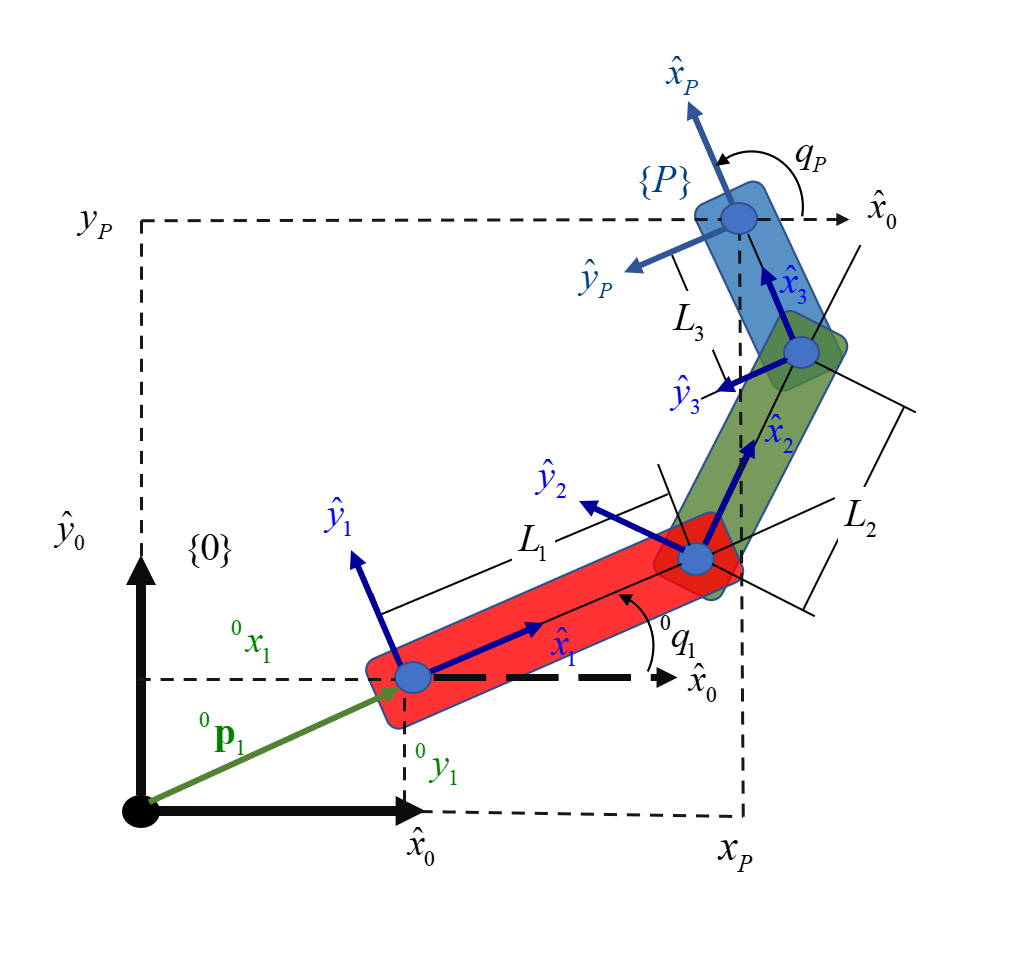
</p>

### Planteamiento del modelo cinemático de la posición

Se basa en describir el movimiento de un robot utilizando ecuaciones que relacionan su posición, velocidad y orientación. A continuación, se presentan los conceptos clave y las ecuaciones relevantes para el modelo cinemático de un robot tipo unicycle, que es uno de los modelos más simples y comunes. El modelo cinemático de la posición describe cómo se relacionan los ángulos articulares (o desplazamientos) con la posición y orientación del efector final (la herramienta o pinza).


$$T_{\mathit{\mathbf{n}}} =f\left(q_1 ,q_2 ,\ldotp \ldotp \ldotp ,q_n \right)$$

donde tenemos que:

-  $T_{n\;}$ es la matriz homogénea.
-  $q_i$ son las variables articulares.
-  $f$ es una función obtenida mediante multiplicación de matrices de transformación sucesivas.

<u>Definición de la estructura del robot</u>


Para un robot SCARA de 3 GDL, normalmente:

-  $q_{1\;\;} ,q_2$ son articulaciones rotacionales en el plano XY.
-  $q_3$ es una articulación prismática referida a el movimiento en el eje Z.

Mientras que los parámetros geométricos son:

-  $L_1 ,L_2$ longitudes de los eslabones 1 y 2.
-  $d_3$ desplazamiento vertical del tercer eje.

Se usa la convención <u>Denavit–Hartenberg (DH)</u> para describir la geometría de cada eslabón. Esta matriz contiene la matriz de orientación, el vector de posición y la escala del punto que se analiza.

<p style="text-align:left">
   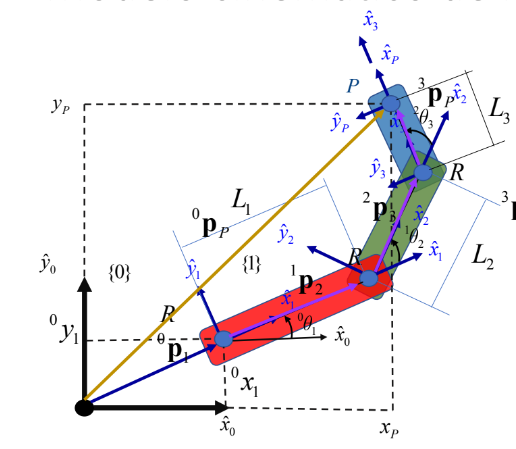
</p>


La relación entre los sistemas de coordenadas se establece mediante matrices de transformación homogénea (T), las cuales representan la traslación y rotación entre un sistema y el siguiente.


In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1

T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1)

In [3]:
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2)

In [4]:
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3)


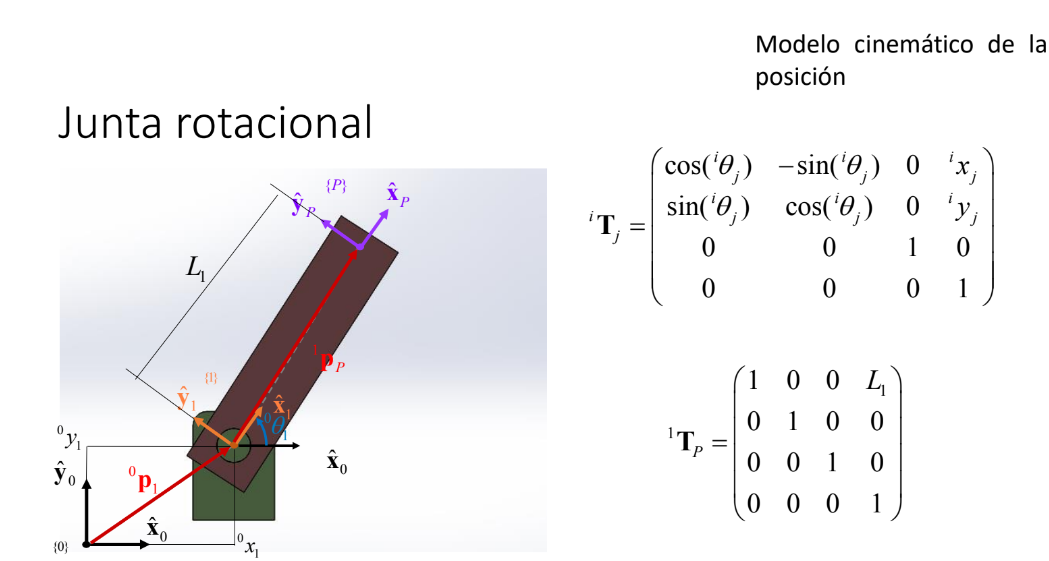  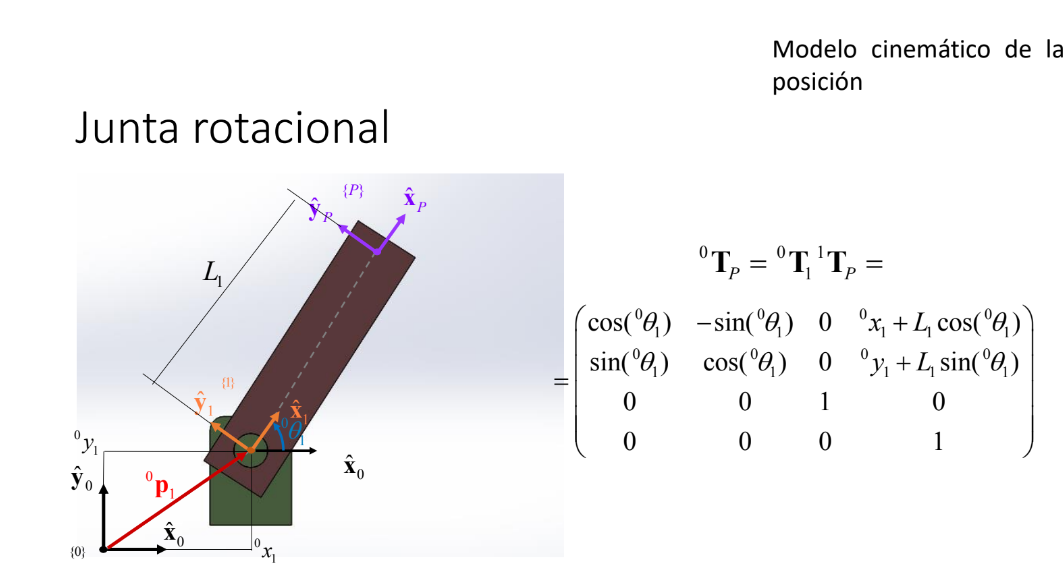


In [5]:
T_3_P = Tij(L_3,0,0,0,0,0)

In [6]:
T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)


<u>Vector de postura del robot</u>


Describe completamente la configuración del efector final del robot respecto al sistema de referencia base. Incluye tanto su posición como su orientación. Para nuestro caso específico de estudio, obetenemos la posición de nuestro punto P y el ángulo con el cual definimos su orientación. Ambos valores se obtienen con lo realizado previamente.


In [7]:
xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]

### Modelo Cinemático Inverso

El modelo cinemático inverso es el proceso matemático que permite determinar los valores de las articulaciones del robot (ángulos o desplazamientos) necesarios para que el efector final (la herramienta, pinza o actuador) llegue a una posición y orientación deseadas en el espacio. Los ángulos los obtenemos utilizando el teorema de Pitágoras, leyes de senos y cosenos. Comenzando por el cálculo de $a_y$ y $a_x$, los cuales son la suma de las proyecciones de los triángulos que se forman con con $\theta_{0,1}$ y $\theta_{1,2}$.


In [8]:
a_y=L_1*sin(theta_O_1)+L_2*sin(theta_O_1+theta_1_2)

In [9]:
a_x = L_1*cos(theta_O_1)+L_2*cos(theta_O_1)+L_2*cos(theta_O_1+theta_1_2)


Con los valores de $a_y$ y $a_x$ calculamos, podemos aplicar el teorema de Pitágoras esto con el fin de conocer la magnitud del vector R, el cual representa la distancia que existe entre el sistema 1 y 2 del triángulo formado por las longitudes de los eslabones:


$$R=\sqrt{{a_x }^2 +{a_y }^2 }$$

Donde de la ley de cosenos deducimos el ángulo gamma de la siguiente manera:


In [10]:
R = sqrt(a_x.^2 + a_y.^2)

In [11]:
gamma =acos ((R.^2 - L_1.^2)/(-2*L_1*L_2))


Determinando el valor de $\theta_{1,2}$:


$$\theta_{1,2} =\pi -\textrm{acos}\left(\frac{R^2 -{L_1 }^2 -{L_2 }^2 }{2L_1 L_2 }\right)$$

Mientras que para obtener $\theta_{0,1} \;$ necesitamos el cálculo de los ángulos $\alpha$ y $\psi$. Donde el ángulo $\alpha$ se consigue a partir del triángulo rectángulo que se forma por el sistema de coordenadas 1 y 3, el cual a su vez pasa por el sistema 2. Esto se consigue aplicando la definición de coseno. De la siguiente manera:


In [12]:
syms L_1 L_2 theta_O_1 theta_1_2 alfa
numerador = L_1 + L_2*cos(theta_1_2);
denominador = sqrt( (L_1*cos(theta_O_1) + L_2*cos(theta_O_1 + theta_1_2))^2 + (L_1*sin(theta_O_1) + L_2*sin(theta_O_1 + theta_1_2))^2 );
cos_alfa = numerador / denominador

In [13]:
%. Despeje de alfa usando el arcocoseno
alfa = acos(cos_alfa)


Repetimos el proceso para encontrar el ángulo $\o$:

<p style="text-align:left">
   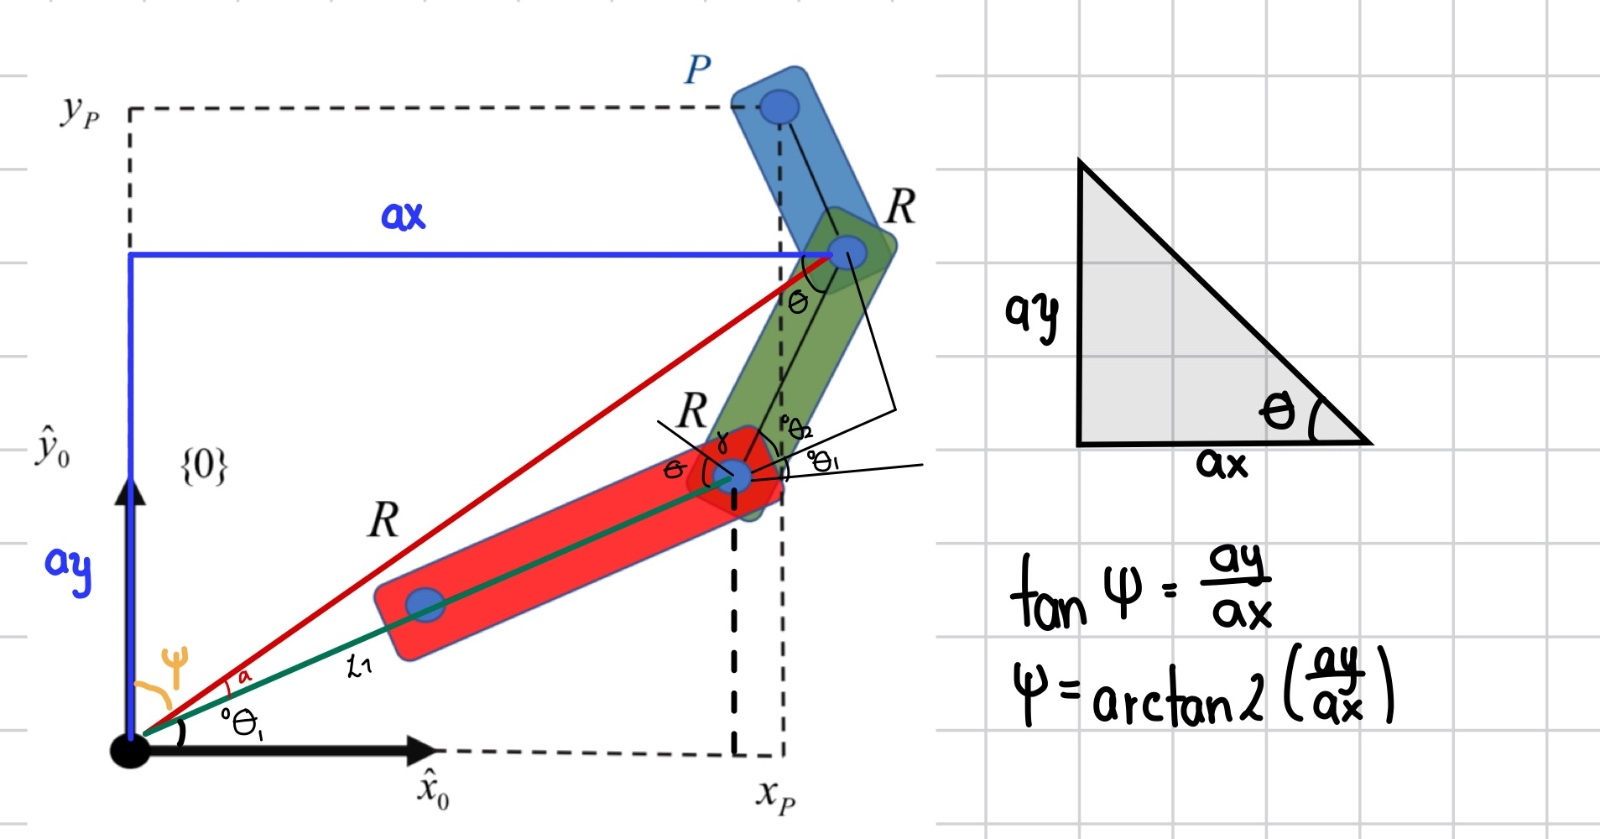
</p>


In [14]:
%Se utiliza la función atan, ya que permite obtener soluciones en los cuatro cuadrantes del plano cartesiano.
Phi=atan2(a_y,a_x)


Podemos obtener una relación donde: $\theta_{0,1} =\o -\alpha$


Para obtener la expresión de $\theta_{2,3}$ se sigue este procedimiento:

<p style="text-align:left">
   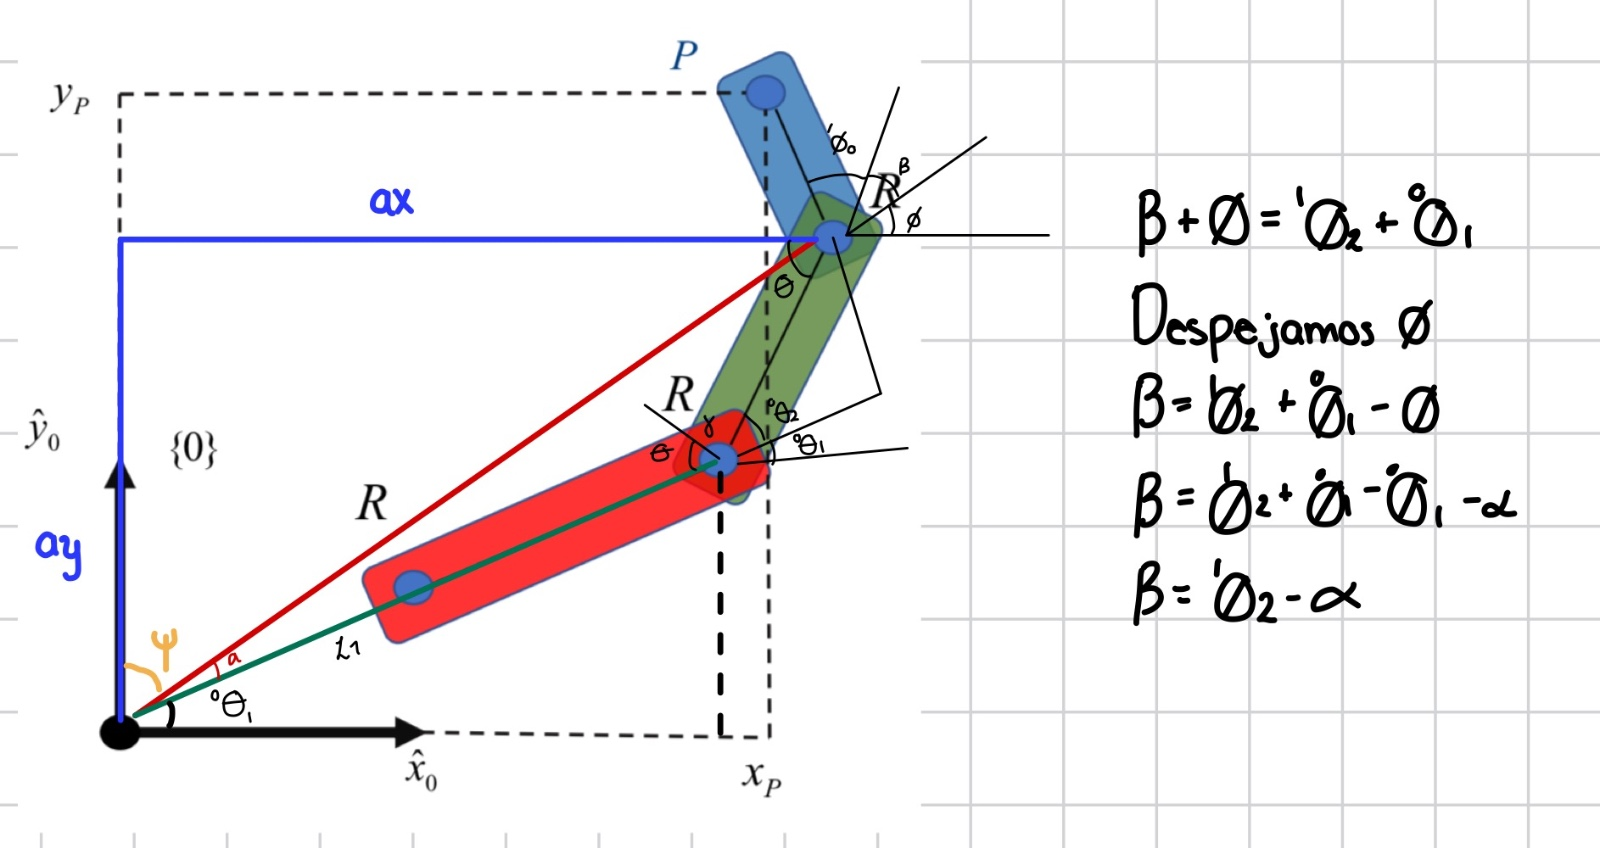
</p>


Se utiliza el teorema de Pitágoras para saber la longitud de N: $N=\sqrt{{a_{\textrm{xs}} }^2 +{a_{\textrm{ys}} }^2 }$


Despejamos el ángulo $\chi ,\beta$ y $\theta_{2,3}$ forman un ángulo $\pi$, obtenemos la siguiente relación:


$$\chi =\textrm{arcos}\left(\frac{N^2 -L^2 -R^2 }{-2{\textrm{RL}}_3 }\right)$$

$$\theta_{2,3} =\pi -\chi -\beta$$

Una vez con esto queremos obtener el valor del ángulo $\kappa$ de la siguiente manera:


$$\tan \left(\kappa \right)=\frac{a_{\textrm{ys}} }{a_{\textrm{xs}} }$$

$$\kappa =\tan^{-1} \left(\frac{a_{\textrm{ys}} }{a_{\textrm{xs}} }\right)=\textrm{atan2}\left(a_{\textrm{ys}} ,a_{\textrm{xs}} \right)$$

Tomando en cuenta la relación entre los ángulos: $\delta =\kappa -\phi$


Este procedimiento determina todos los valores angulares de las articulaciones robóticas, lo que posibilita alcanzar la posición deseada del punto P dentro del espacio de trabajo.


$$\theta_{2,3} =\pi -\chi -\beta$$

$$\theta_{0,1} =\phi -\alpha$$

$$\theta_{1,2} =\pi -\textrm{acos}\left(\frac{R^2 -{L_1 }^2 -{L_2 }^2 }{2L_1 L_2 }\right)$$
### Modelo cinemático directo de las velocidades

En el análisis cinemático diferencial, la matriz Jacobiana (J) proporciona el mapeo entre el espacio de articulaciones y el espacio operacional, transformando velocidades angulares de los actuadores en velocidades lineales y angulares del efector final. La relación se describe con la siguiente ecuación:


$$\dot{x} =J\left(q\right)\dot{q}$$

Donde:

-  $\dot{x}$ es el vector de velocidades del efector final.
-  $J\left(q\right)$ es la matriz Jacobiana, la cual depende de los angulos $q$.
-  $\dot{q} \;$ es el vector de velocidades de las articulaciones.

In [15]:
syms J_theta
J_theta

In [16]:
J_theta = jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3])

### Modelo cinemático inverso de las velocidades

Es la relación inversa que transforma velocidades cartesianas del efector final en velocidades articulares, utilizada para calcular los movimientos articulares necesarios que generen una velocidad deseada en el extremo del robot. En nuestro caso particular queremos despejar el vector $\dot{\theta}$ de la expresión cinemática directa de las velocidades. Se multiplica ambos lados de la igualdad por la inversa del jacobiano esto con el fin de aislar las velocidades articulares.


$$\dot{\theta} =J^{-1} \left(\theta \right)\cdot \dot{x}$$

Donde:

-  $\dot{\theta}$ es el vector de velocidades articulares.
-  $\dot{x}$ es el vector de velocidad lineal y angular de la pose.
-  $J^{-1} \left(\theta \right)$ es la inversa del Jacobiano.

Generalmente, cuando el Jacobiano no es una matriz cuadrada. No obstante, en este caso específico, dado que el Jacobiano resulta ser una matriz cuadrada de dimensiones 3×3, es posible y suficiente calcular su inversa directa para obtener una solución exacta y única. Esta aproximación es válida siempre que el robot no se encuentre en una configuración singular, condición que debe verificarse cuidadosamente durante el análisis.


In [17]:
inv(J_theta)

### Rango de movimiento

El rango de movimiento es el conjunto de posiciones y orientaciones que el efector final puede alcanzar físicamente, dadas las longitudes de los eslabones y los límites mecánicos de cada articulación. En otras palabras: es el “volumen” o “área” del espacio dentro del cual el robot puede moverse libremente.


In [18]:
d= det(J_theta)

In [19]:
determinante_J = simplify(d)


Elaboramos una gráfica esto con el fin de observar las variables que influyen directamente en el determinante del Jacobiano, los valores fijos son refereidos a las longitudes de los eslabones y los valores que se varian son referidos a el ángulo del que depende el determinante:



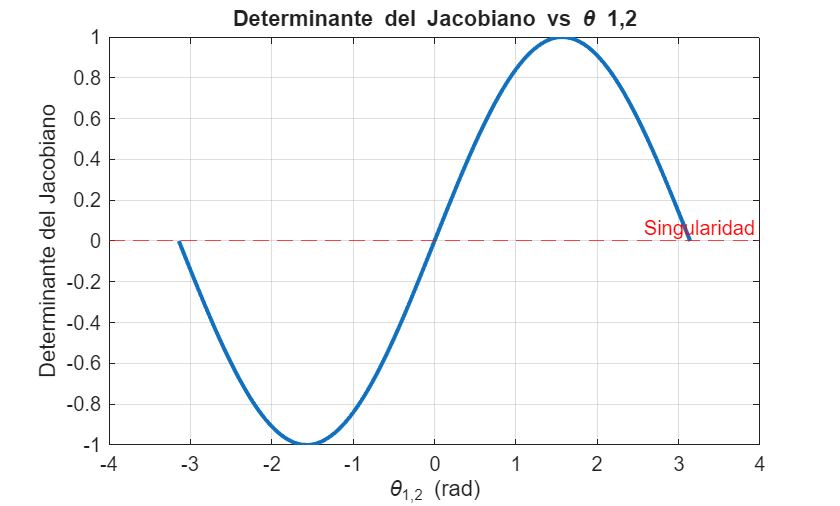

In [20]:
syms theta_1_2 L1 L2
detJ= L1 * L2 * sin(theta_1_2);
f_detJ= matlabFunction(detJ, 'Vars', [theta_1_2, L1, L2]);

%Rango de valores
theta_1_2_vals = linspace(-pi, pi , 500);
L1_val = 1;
L2_val =1;

%Evaluar determinante
det_vals = f_detJ(theta_1_2_vals, L1_val, L2_val);

%Grafica
figure
plot(theta_1_2_vals, det_vals,'LineWidth',2)
xlabel('\theta_{1,2} (rad)')
ylabel('Determinante del Jacobiano')
title('Determinante del Jacobiano vs \theta {1,2}')
grid on
yline(0, '--r', 'Singularidad')


Lo que podemos observar gracias a nuestra gráfica es que en el valor cero el determinante del Jacobiano y $\theta_{1,2}$ toman el mismo valor (cero). Y el determinante alcanza su valor máximo a razón que el ángulo aumenta hasta $\frac{\pi }{2}$ (rad).


El determinante presenta una dependencia directa con las longitudes de los eslabones, observándose que dimensiones mayores en los componentes estructurales del robot resultan en un volumen de trabajo más amplio y capacidades de movimiento mejoradas.

### Modelo cinemático de las aceleraciones

El modelo cinemático de las aceleraciones describe cómo se relacionan las aceleraciones articulares $\left(\ddot{q} \right)$ con las aceleraciones lineales y angulares del efector final $\ddot{x}$. Nos dice cómo cambia la velocidad del efector final cuando las articulaciones del robot aceleran o desaceleran.Se obtiene derivando el modelo cinemático de velocidades respecto al tiempo.


$$\ddot{x} =\dot{J} \left(q,\dot{q} \right)q+J\left(q\right)\ddot{q}$$

Donde $\dot{J}$ representa la derivada de la matriz Jacobiana respecto al tiempo.


Para este caso se utiliza la regla de la cadena como se muestra a continuación:


In [21]:
% 1. Definimos las velocidades de las articulaciones como nuevas variables simbólicas
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3

% 2. Creamos un vector de variables de articulación (q) y un vector de velocidades (q_dot)
% OJO: q_dot DEBE ser un vector columna (con punto y coma) para que funcione la multiplicación
q = [theta_O_1, theta_1_2, theta_2_3];
q_dot = [theta_dot_O_1; theta_dot_1_2; theta_dot_2_3];

% 3. Calculamos la derivada del Jacobiano (J_dot) usando la regla de la cadena
J_dot = sym(zeros(size(J_theta)));
for i = 1:length(q)
    J_dot = J_dot + diff(J_theta, q(i)) * q_dot(i);
end

J_dot


Con la derivada del Jacobiano obtenida, lo que procedemos a hacer es derivar el vector de velocidades articulares:


In [22]:
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3
q_ddot = [theta_ddot_O_1; theta_ddot_1_2; theta_ddot_2_3];
q_ddot


Obtenemos: $\ddot{x} =\dot{J} \left(\theta \right)\cdot \dot{\theta} +J\left(\theta \right)\cdot \ddot{\theta}$ Donde tenemos que $\dot{J} \left(\theta \right)$ es igual a lo siguiente:


In [23]:
% Se construye la aceleración del efector final(x_ddot)
x_ddot = J_dot * q_dot + J_theta * q_ddot;

% Se simplifica el resultado
x_ddot = simplify(x_ddot)

### Modelo cinemático inverso de aceleraciones

Nos dice cómo se relacionan las aceleraciones articulares con las aceleraciones cartesianas del efector (y viceversa). Lo obtenemos despejando $\ddot{q}$ de la ecuación del modelo directo. Donde obtenemos lo siguiente:


$$\ddot{q} =J^{-1} \left(q\right)\left(\ddot{x} -\dot{J} \left(q,\dot{q} \right)\dot{q} \right)$$

In [24]:
%Tomando en cuenta que varios de los valores que necesitamos fueron
% Se define como entrada la aceleración que se desea del efector final.
% Lo creamos como un vector simbólico genérico.
syms x_ddot_deseado y_ddot_deseado theta_ddot_deseado
x_ddot_in = [x_ddot_deseado; y_ddot_deseado; theta_ddot_deseado];
% Cálculo de la inversa del Jacobiano(J_inv).
J_inv = inv(J_theta);
% Usamos lavfórmula de la cinemática inversa de aceleraciones:
q_ddot_calculado = J_inv * (x_ddot_in - J_dot * q_dot);

% Simplificación y muestra del resultado obtenido
q_ddot_calculado = simplify(q_ddot_calculado)

### Modelo dinámico (usando Eüler\-Lagrange)

El modelo dinámico describe cómo las fuerzas y torques aplicados en las articulaciones producen movimiento (aceleraciones). A diferencia de la cinemática (posición, velocidad, aceleración), que solo estudia el movimiento, la dinámica incorpora masas, inercias y fuerzas externas.


Se basa en el principio de energía: la diferencia entre la energía cinética y la energía potencial determina la dinámica del sistema.


La formulación de Euler–Lagrange utiliza el Lagrangiano:


$$L=K-U$$

Donde:

-  K: Energía cinética total del robot.
-  U: Energía potencial total (debido a la gravedad).

Para la energía cinética tenemos el siguiente cálculo:


$$k_i =\frac{m_i }{2}v_{C_i }^T v_{C_i } +\frac{1}{2}\omega_{C_i }^T I_{C_i } \omega_{C_i }$$

Para realizar los cálculos correspondientes vamos a realizar una propagación de velocidades desde el eslabón base hasta cada eslabon de manera sucesiva. También se puede calcular la posición del centro de gravedad de cada eslabón respecto al sistema de inercia de coordenadas, una vez obtenido lo anterior se deriva dicha posición para que se obtenga la velocidad lineal.


In [25]:
syms x_1_C1 theta_dot_O_1

v_C1_C1 = [0;x_1_C1*theta_dot_O_1;0]

In [26]:
v_O_C1 = [-x_1_C1*sin(theta_O_1)*theta_dot_O_1;x_1_C1*cos(theta_O_1)*theta_dot_O_1;0]

In [27]:
transpose(v_C1_C1)*v_C1_C1

In [28]:
simplify(transpose(v_O_C1)*v_O_C1)


<u>Propagación de velocidades</u>


Velocidades angulares:


$${}^{i+1}{\omega }_{i+1}={}^{i+1}R_i{}^i{\omega }_i+{}^{i+1}{\hat{z} }_{i+1}{\dot{\theta} }_{i+1}$$

Velocidades lineales:


$${}^{i+1}v_{i+1}={}^{i+1}R_i\left({}^iv_i+{}^i{\omega }_i\times {}^ip_{i+1}\right)$$

Para continuar con el procedimiento tenemos que obtener las matrices de orientación para cada uno de los sistemas colocados en las juntas. Obtenemos lo anterior de la matriz de transformación de cada junta con respecto al punto inmediato anterior(T\_O\_1, T\_1\_2, T\_2\_3).


In [29]:
R_0_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]

In [30]:
R_1_0 = transpose(R_0_1)

In [31]:

R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]

In [32]:
R_2_1 = transpose(R_1_2)

In [33]:
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [34]:
R_3_2 = transpose(R_2_3)


El siguiente paso es obtener las velocidades lineales de los centros de masa, es necesario calcular previamente las velocidades angulares de cada eslabón. Por lo que hay que definir un vector de valor unitario el cual nos indique la dirección del eje de rotación. En este caso, dado que el movimiento ocurre alrededor del eje Z, se tiene:


$$n_{1,1} =n_{2,2} =n_{3,3} =\left\lbrack \begin{array}{c} 0\newline 0\newline 1 \end{array}\right\rbrack$$

Se utiliza la transpuesta de la matriz de orientación que anteriormente se calculó, la derivada angular correspondiente a cada eslabón y la velocidad angular anterior.


In [35]:
syms omega_1_1 omega_2_2 omega_3_3
%Propagación para el primer cuerpo
omega_1_1


Para omega\_0\_0


In [36]:
omega_O_O=[0;0;0]

omega_O_O = 3x1
     0
     0
     0

In [37]:
n_1_1 = [0;0;1]

n_1_1 = 3x1
     0
     0
     1

In [38]:
R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]

In [39]:
R_1_O = transpose(R_O_1)


Para omega\_1\_1:


In [40]:
omega_1_1 = R_1_0*omega_O_O+n_1_1*theta_dot_O_1


Para omega\_2\_2:


In [41]:
omega_2_2

In [42]:
n_2_2 = [0;0;1]

n_2_2 = 3x1
     0
     0
     1

In [43]:
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]

In [44]:
R_2_1 = transpose(R_1_2)

In [45]:
%Ecuación de propagación
omega_2_2 = R_2_1*omega_1_1+n_2_2*theta_dot_1_2


Para omega\_3\_3:


In [46]:
omega_3_3

In [47]:
n_3_3 = [0;0;1]

n_3_3 = 3x1
     0
     0
     1

In [48]:
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [49]:
R_3_2 = transpose(R_2_3)

In [50]:
%Ecuación de propagación
omega_3_3=R_3_2*omega_2_2+n_3_3*theta_dot_2_3

In [51]:
v_O_C3


Para la primera parte, la velocidad lineal del sistema uno esta dada por la siguiente formula:

<p style="text-align:left">
   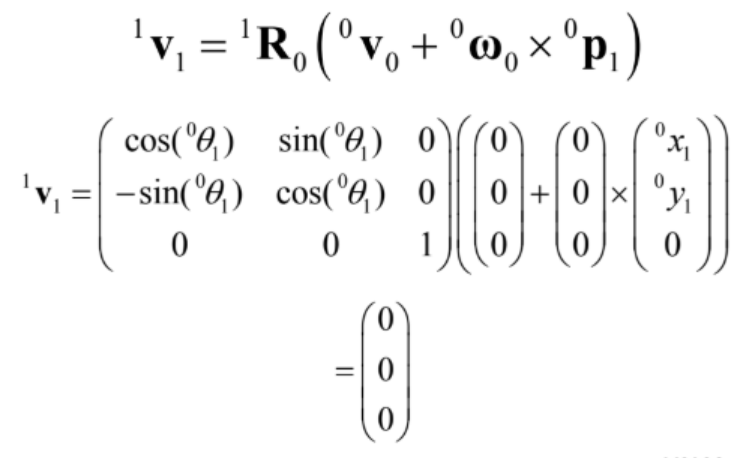
</p>


In [52]:
% La velocidad lineal de la base del robot (v_O_O) es cero.
v_O_O = [0;0;0];

% La velocidad angular de la base (omega_O_O) es cero.
% (Asegúrate de que esta línea esté con punto y coma en tu código).
omega_O_O = [0;0;0];

% El vector de posición desde el origen {O} al origen {1} es cero,
% ya que están en el mismo lugar.
p_O_1 = [0;0;0];

% Aplicamos la ecuación de propagación de la velocidad lineal:
% v_1_1 = R_1_O * (v_O_O + cross(omega_O_O, p_O_1))
v_1_1 = R_1_O * (v_O_O + cross(omega_O_O, p_O_1))


Para el sistema 2 se tiene:


In [53]:
v_2_2 = R_2_1*(v_1_1 + cross(omega_1_1,[L1;0;0]))


Para el sistema 3:


In [54]:
V_3_3 = simplify(R_3_2*(v_2_2+cross(omega_2_2,[L2;0;0])))


Para el cálculo de la propagación de velocidades hacia los centros de masa, utilizamos la misma fórmula usada para la propagación entre juntas, tomando en cuenta que las velocidades angulares en el centro de masa de cada eslabón son iguales a las del sistema de coordenadas asociado a la junta correspondiente. Se muestra el cálculo para el centro de masa del primer eslabón:



In [55]:
v_C1_C1 = [0;x_1_C1*theta_dot_O_1;0]


Para el centro de masa del segundo eslabón:


In [56]:
v_C2_C2 = ([1, 0, 0; 0,1,0;0,0,1]*(v_2_2+cross(omega_2_2,[x_2_C2;0;0])))


Para el centro de masa del tercer eslabón:


In [57]:
v_c3_c3 = ([1,0,0;0,1,0;0,0,1]*(V_3_3+cross(omega_3_3,[x_3_C3;0;0])))


Para estas velocidades, la matriz de orientación es la matriz identidad debido a que el sistema de la junta no cambia con respecto al del centro de masa.

### Posición de los centros de masa

Debemos obtener las transformadas de cada punto de interés, esto haciendo la suposición de que el centro de masa de cada eslabón se encuentra justo en su punto medio.


La transformada de C1


In [58]:
syms x_1_C1 x_2_C2 x_3_C3

T_1_C1 = Tij(x_1_C1,0,0,0,0,0)

In [59]:
T_O_C1 = T_O_1*T_1_C1


La transformada de C2


In [60]:
T_2_C2 = Tij(x_2_C2,0,0,0,0,0)

In [61]:
T_O_C2 = T_O_1*T_1_2*T_2_C2


La transformada de C3


In [62]:
T_3_C3 = Tij(x_3_C3,0,0,0,0,0)

In [63]:
T_O_C3 = T_O_1*T_1_2*T_2_3*T_3_C3


Posteriormente hay que obtener los datos de posición(vectores de posición) para cada transformación que calculamos previamente:


Para P\_O\_C1


In [64]:
%Vectores de posición
p_O_C1 = [T_O_C1(1,4);T_O_C1(2,4);T_O_C1(3,4)]


Para P\_O\_C2


In [65]:
p_O_C2 = simplify([T_O_C2(1,4);T_O_C2(2,4);T_O_C2(3,4)])


Para P\_O\_C3


In [66]:
p_O_C3 = simplify([T_O_C3(1,4);T_O_C3(2,4);T_O_C3(3,4)])

### Cálculo de las velocidades

Para V\_O\_C1


In [67]:
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3

v_O_C1 = diff(p_O_C1,theta_O_1)*theta_dot_O_1+diff(p_O_C1,theta_1_2)*theta_dot_1_2+diff(p_O_C1,theta_2_3)*theta_dot_2_3


Para V\_O\_C2


In [68]:
v_O_C2 = diff(p_O_C2,theta_O_1)*theta_dot_O_1+diff(p_O_C2,theta_1_2)*theta_dot_1_2+diff(p_O_C2,theta_2_3)*theta_dot_2_3


Para V\_O\_C3


In [69]:
v_O_C3 = diff(p_O_C3,theta_O_1)*theta_dot_O_1+diff(p_O_C3,theta_1_2)*theta_dot_1_2+diff(p_O_C3,theta_2_3)*theta_dot_2_3


### Cálculo de las velocidades angulares

In [70]:
syms omega_1_1 omega_2_2 omega_3_3
%Propagación para el primer cuerpo
omega_1_1

In [71]:
omega_O_O = [0;0;0]

omega_O_O = 3x1
     0
     0
     0

In [72]:
n_1_1 = [0;0;1]

n_1_1 = 3x1
     0
     0
     1

In [73]:
R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]

In [74]:
R_1_O = transpose(R_O_1)

In [75]:
%Ecuación de propagación
omega_1_1 = R_1_O*omega_O_O+n_1_1*theta_dot_O_1

In [76]:
%Propagación para el segundo cuerpo
omega_2_2

In [77]:
n_2_2 = [0;0;1]

n_2_2 = 3x1
     0
     0
     1

In [78]:
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]

In [79]:
R_2_1 = transpose(R_1_2)

In [80]:
%Ecuación de propagación
omega_2_2 = R_2_1*omega_1_1+n_2_2*theta_dot_1_2

In [81]:
%Propagación para el tercer cuerpo
omega_3_3

In [82]:
n_3_3 = [0;0;1]

n_3_3 = 3x1
     0
     0
     1

In [83]:
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [84]:
R_3_2 = transpose(R_2_3)

In [85]:
%Ecuación de propagación
omega_3_3 = R_3_2*omega_2_2+n_3_3*theta_dot_2_3

In [86]:
v_O_C3

### Definición de los elementos de inercia

In [87]:
syms g I_xx1 I_yy1 I_zz1 I_xx2 I_yy2 I_zz2 I_xx3 I_yy3 I_zz3
%vector de gravedad
g_v = [0;-g;0]

In [88]:
I_C1 = [I_xx1,0,0;0,I_yy1,0;0,0,I_zz1]

In [89]:
I_C2 = [I_xx2,0,0;0,I_yy2,0;0,0,I_zz2]

In [90]:
I_C3 = [I_xx3,0,0;0,I_yy3,0;0,0,I_zz3]


<u>Cálculo del Lagrangeano:</u>


In [91]:
syms m_1 m_2 m_3
%energía cinética de cada uno de los cuerpos

k_1 = simplify((m_1/2)*transpose(v_O_C1)*v_O_C1+(1/2)*transpose(omega_1_1)*I_C1*omega_1_1)

In [92]:
k_2 = simplify((m_2/2)*transpose(v_O_C2)*v_O_C2+(1/2)*transpose(omega_2_2)*I_C2*omega_2_2)

In [93]:
k_3 = simplify((m_3/2)*transpose(v_O_C3)*v_O_C3+(1/2)*transpose(omega_3_3)*I_C3*omega_3_3)

In [94]:
% Cáclulo de la energía potencial de cada cuerpo

u_1 = -m_1*transpose(p_O_C1)*g_v

In [95]:
u_2 = -m_2*transpose(p_O_C2)*g_v

In [96]:
u_3 = -m_3*transpose(p_O_C3)*g_v


<u>Cálculo del Lagrangeano:</u>


In [97]:
La = (k_1+k_2+k_3)-(u_1+u_2+u_3)

### Cálculo de los pares

In [98]:
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3

D_theta1 = diff(La,theta_dot_O_1)

In [99]:
% Cálculo de relación

tao_1 = diff(D_theta1,theta_O_1)*theta_dot_O_1 + diff(D_theta1,theta_1_2)*theta_dot_1_2 + diff(D_theta1,theta_2_3)*theta_dot_2_3 + diff(D_theta1,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta1,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta1,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_O_1)

In [100]:
D_theta2 = diff(La,theta_dot_1_2)

In [101]:
tao_2 = diff(D_theta2,theta_O_1)*theta_dot_O_1 + diff(D_theta2,theta_1_2)*theta_dot_1_2 + diff(D_theta2,theta_2_3)*theta_dot_2_3 + diff(D_theta2,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta2,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta2,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_1_2)

In [102]:
D_theta3 = diff(La,theta_dot_2_3)

In [103]:
tao_3 = diff(D_theta3,theta_O_1)*theta_dot_O_1 + diff(D_theta3,theta_1_2)*theta_dot_1_2 + diff(D_theta3,theta_2_3)*theta_dot_2_3 + diff(D_theta3,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta3,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta3,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_2_3)

In [104]:
tao = [tao_1;tao_2;tao_3]

In [105]:
% Cálculo de la matriz de inercia

M1 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[1,0,0,0,0,0,0])

In [106]:
M2 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,1,0,0,0,0,0])

In [107]:
M3 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,1,0,0,0,0])

In [108]:
M_theta = collect([M1 M2 M3],[m_1,m_2,m_3])


<u>Cálculo del vector de pares</u>


In [109]:
V_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,0])

In [110]:
G_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,0,0,0,g])

### Cálculo del modelo dinámico directo

Para el cálculo del modelo dinámico se obtiene tau de manera simbólica con la matriz de inercia (M\_theta) y el vector de pares (V\_theta y G\_theta).


In [111]:
tau = M_theta * [theta_ddot_O_1; theta_ddot_1_2; theta_ddot_2_3] + V_theta + G_theta;
disp(tau)

### Cálculo del modelo dinámico inverso

In [112]:
Invtheta_ddot = inv(M_theta) * (tau - V_theta - G_theta);
disp(Invtheta_ddot)

## Simulación

In [113]:
% ==========================================================
% == PASO 1: DEFINIR PARÁMETROS PARA LA SIMULACIÓN ==
% ==========================================================

% Longitudes de los eslabones (en metros)
L_1 = 0.5;
L_2 = 0.4;
L_3 = 0.2;

% Masas de los eslabones (en kg)
m_1 = 1.0;
m_2 = 0.8;
m_3 = 0.5;

% Posiciones de los centros de masa (respecto al inicio de cada eslabón)
x_1_C1 = L_1 / 2;
x_2_C2 = L_2 / 2;
x_3_C3 = L_3 / 2;

% Inercias de los eslabones (simplificadas, asumimos que son cilindros delgados)
I_zz1 = (1/12) * m_1 * L_1^2;
I_zz2 = (1/12) * m_2 * L_2^2;
I_zz3 = (1/12) * m_3 * L_3^2;

% Variables iniciales y constantes
x_O_1 = 0;
y_O_1 = 0;
g = 9.81; % Aceleración de la gravedad


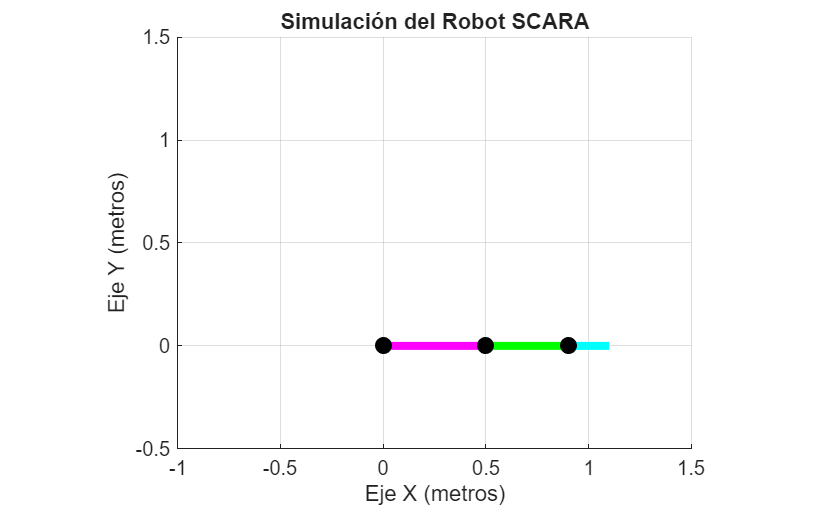

In [114]:
% ==========================================================
% == PASO 2: CÓDIGO DE ANIMACIÓN DE LA SIMULACIÓN ==
% ==========================================================

% --- Definir la trayectoria del movimiento ---
% Ángulos iniciales (en radianes)
q_inicial = [0; 0; 0];
% Ángulos finales (en radianes)
q_final = [pi/2; pi/4; -pi/2];

% Número de pasos para la animación
pasos = 50;

% -- INICIA CORRECCIÓN --
% Creamos la trayectoria manualmente para asegurar la compatibilidad
q_traj = zeros(3, pasos); % Creamos una matriz vacía para los resultados
for i = 1:pasos
    % Calculamos cada paso intermedio entre el inicio y el final
    q_traj(:, i) = q_inicial + (q_final - q_inicial) * (i-1)/(pasos-1);
end
% -- TERMINA CORRECCIÓN --

% --- Preparar la figura para la animación ---
figure;% Crea una nueva ventana para la figura
shg;
hold on; % Mantiene los dibujos en la misma figura
axis equal; % Hace que los ejes X e Y tengan la misma escala
grid on; % Pone una rejilla
xlim([-1 1.5]); % Límite del eje X
ylim([-0.5 1.5]); % Límite del eje Y
title('Simulación del Robot SCARA');
xlabel('Eje X (metros)');
ylabel('Eje Y (metros)');

% --- Bucle de Animación ---
for i = 1:pasos
    % Tomar los ángulos para el paso actual
    theta1 = q_traj(1, i);
    theta2 = q_traj(2, i);
    theta3 = q_traj(3, i);

    % Calcular la posición de cada articulación usando la cinemática directa
    % Posición de la Articulación 1 (siempre en el origen)
    P0 = [0; 0];
    % Posición de la Articulación 2
    P1 = [L_1*cos(theta1); L_1*sin(theta1)];
    % Posición de la Articulación 3
    P2 = [L_1*cos(theta1) + L_2*cos(theta1+theta2); L_1*sin(theta1) + L_2*sin(theta1+theta2)];
    % Posición del Efector Final (Punta)
    P3 = [L_1*cos(theta1) + L_2*cos(theta1+theta2) + L_3*cos(theta1+theta2+theta3);
          L_1*sin(theta1) + L_2*sin(theta1+theta2) + L_3*sin(theta1+theta2+theta3)];

    % Dibujar el robot en la posición actual
    cla; % Limpia el dibujo anterior
    plot([P0(1) P1(1)], [P0(2) P1(2)], '-m', 'LineWidth', 4); % Dibuja el eslabón 1
    plot([P1(1) P2(1)], [P1(2) P2(2)], '-g', 'LineWidth', 4); % Dibuja el eslabón 2
    plot([P2(1) P3(1)], [P2(2) P3(2)], '-c', 'LineWidth', 4); % Dibuja el eslabón 3

    % Dibujar las articulaciones
    plot(P0(1), P0(2), 'ok', 'MarkerFaceColor', 'k', 'MarkerSize', 8);
    plot(P1(1), P1(2), 'ok', 'MarkerFaceColor', 'k', 'MarkerSize', 8);
    plot(P2(1), P2(2), 'ok', 'MarkerFaceColor', 'k', 'MarkerSize', 8);

    drawnow; % Actualiza el dibujo
    pause(0.05); % Pausa para que el movimiento sea visible
end

### Conclusiones

Para finalizar, el desarrollo del modelo dinámico y cinemático del robot SCARA posibilitó una comprensión completa de la manera en que se fusionan los principios físicos, matemáticos y computacionales para caracterizar y regular el movimiento de un sistema robótico real. La importancia de dominar estos principios para elaborar y programar robots capaces de realizar tareas de ensamblaje, manipulación o transporte con gran rapidez y precisión se demostró a través del análisis de sus ecuaciones de posición, velocidad, aceleración y dinámica empleando el método Euler\-Lagrange. El SCARA, debido a su rigidez en el plano horizontal y su flexibilidad en el eje vertical, muestra cómo la estructura mecánica afecta su dinámica, su espacio de trabajo y su uso en ambientes de trabajo.En conjunto, este análisis refuerza la importancia de la modelación robótica como base para la automatización moderna, la optimización de movimientos y el desarrollo de tecnologías.

